# Machine Learning Notebook 8: Logistic Regression Classification

### Compiled by Amit Purswani
LinkedIn: https://www.linkedin.com/in/amit-purswani-2a073777/

<b>GitHub Repositories</b>
1. Data Analysis:
https://github.com/kranemetal/Data-Analysis-Projects

2. Machine Learning:
https://github.com/kranemetal/MachineLearning

### Logistic Regression Notes:
- It is a classification algorithm, it helps to predict which class the dependent variable belongs to, the possible outcome is binary i.e. yes/no, 1/0, true/false.
- The outcome is predicted by calculating the probabilities.
- Sigmoid function is used to calculate the probability.
- Sigmoid is a mathematical function that takes any real number and maps it to a probability between 1 and 0.
- For the output probabilities, we can set a threshold as below: <br>
probability < 0.5 means class A <br>
probability >= 0.5 means class B
- Thus we can classify the dependent variable in one of the two classes based on the probability calculated using independent variable(s).

#### Sigmoid Function curve

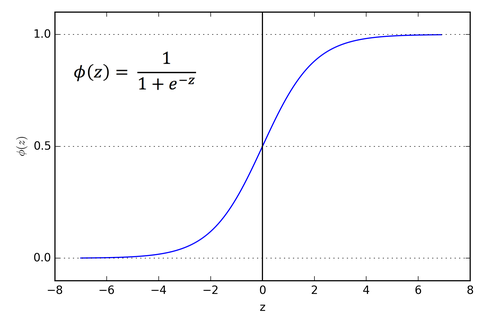

Image Credit: Sagar Sharma (towardsdatascience)

### Importing libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import dataset

In [8]:
df = pd.read_csv('C:\\Users\krane\Desktop\datasets\Social_Network_Ads.csv')

### Basic checks on dataset

In [9]:
df.shape

(400, 3)

In [10]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [11]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [13]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Splitting independent variable X and dependent variable Y

In [14]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### Splitting the train and test datasets

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=0)

### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
print(x_train)

[[-1.1631724  -1.5849703 ]
 [ 2.17018137  0.93098672]
 [ 0.0133054   1.22017719]
 [ 0.20938504  1.07558195]
 [ 0.40546467 -0.48604654]
 [-0.28081405 -0.31253226]
 [ 0.99370357 -0.8330751 ]
 [ 0.99370357  1.8563962 ]
 [ 0.0133054   1.24909623]
 [-0.86905295  2.26126285]
 [-1.1631724  -1.5849703 ]
 [ 2.17018137 -0.80415605]
 [-1.35925203 -1.46929411]
 [ 0.40546467  2.2901819 ]
 [ 0.79762394  0.75747245]
 [-0.96709276 -0.31253226]
 [ 0.11134522  0.75747245]
 [-0.96709276  0.55503912]
 [ 0.30742485  0.06341534]
 [ 0.69958412 -1.26686079]
 [-0.47689368 -0.0233418 ]
 [-1.7514113   0.3526058 ]
 [-0.67297331  0.12125343]
 [ 0.40546467  0.29476771]
 [-0.28081405  0.06341534]
 [-0.47689368  2.2901819 ]
 [ 0.20938504  0.03449629]
 [ 1.28782302  2.20342476]
 [ 0.79762394  0.26584866]
 [-0.28081405  0.15017248]
 [ 0.0133054  -0.54388463]
 [-0.18277423  0.15017248]
 [-0.08473441  0.23692961]
 [ 0.0133054  -0.25469417]
 [ 2.17018137  1.104501  ]
 [-1.7514113   0.3526058 ]
 [ 1.87606192  0.12125343]
 

In [20]:
print(x_test)

[[-0.77101313  0.49720103]
 [ 0.0133054  -0.57280368]
 [-0.28081405  0.15017248]
 [-0.77101313  0.26584866]
 [-0.28081405 -0.57280368]
 [-1.06513258 -1.44037507]
 [-0.67297331 -1.5849703 ]
 [-0.18277423  2.14558666]
 [-1.94749093 -0.05226085]
 [ 0.89566375 -0.775237  ]
 [-0.77101313 -0.60172273]
 [-0.96709276 -0.42820845]
 [-0.08473441 -0.42820845]
 [ 0.11134522  0.20801057]
 [-1.7514113   0.46828198]
 [-0.5749335   1.36477242]
 [-0.08473441  0.20801057]
 [-1.84945111  0.43936294]
 [ 1.67998229  1.74072002]
 [-0.28081405 -1.38253697]
 [-0.28081405 -0.65956082]
 [ 0.89566375  2.14558666]
 [ 0.30742485 -0.54388463]
 [ 0.89566375  1.01774386]
 [-1.45729185 -1.2090227 ]
 [ 1.09174339  2.05882953]
 [-0.96709276  0.49720103]
 [-0.86905295  0.29476771]
 [-0.08473441 -0.22577513]
 [-0.5749335   0.46828198]
 [-1.65337148  0.52612008]
 [-0.08473441  0.26584866]
 [ 1.87606192 -0.28361322]
 [-0.08473441 -0.48604654]
 [-1.35925203 -0.34145131]
 [-1.94749093 -0.51496559]
 [-1.55533166  0.32368675]
 

### Train Logistic Regression model on train set

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

### Predicting a new result
For a customer aged 37 years and earning USD 87k

In [23]:
print(classifier.predict(sc.transform([[37, 87000]]))) #predict method expects input in 2D array

[0]


### Predict test set results

In [25]:
y_pred = classifier.predict(x_test)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1) #print (prediction, actual)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0,

### Check confusion matrix and accuracy score

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred) #confusion matrix(actual, predicted)
print(cm)
accuracy_score(y_test, y_pred)

[[74  5]
 [11 30]]


0.8666666666666667

<b>Note:</b> Here correct predictions from two classes combined is 74+30=104 and incorrect predictions from two classes combined is 5+11=16.<br>
    Hence, the accuracy is 104/(104+16=120) = 86%.

### <center>The End